In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('E:\\Магистратура\\3\\Машинное обучение\\healthcare-dataset-stroke-data.csv', sep=',')
print(df.head(5))
print(df.info())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 e

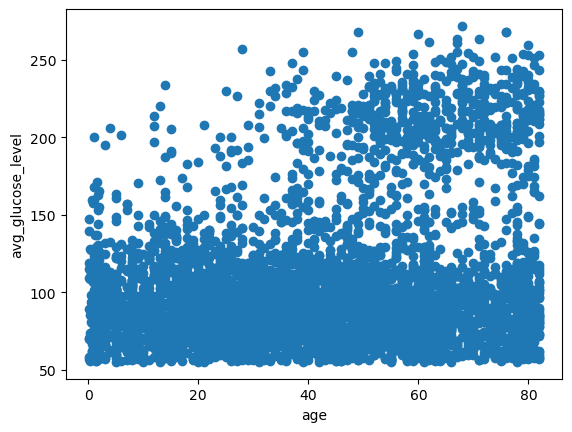

In [32]:
# Диаграмма рассеяния

plt.xlabel('age')
plt.ylabel('avg_glucose_level')
plt.scatter(x=df['age'], y=df['avg_glucose_level'])

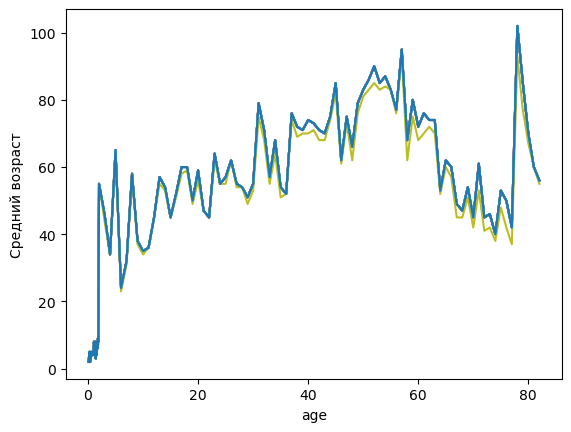

In [33]:
# Линейный гарфик

d = df.groupby(['age']).count()
plt.xlabel('age')
plt.ylabel('Средний возраст')
plt.plot(d.index, d.values)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b9b5e00390>,
 'caps': [<matplotlib.lines.Line2D at 0x1b9b5ef15d0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1b9b5ee3750>],
 'medians': [<matplotlib.lines.Line2D at 0x1b9b5ef2cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b9b5f00290>],
 'means': [<matplotlib.lines.Line2D at 0x1b9b5ebce10>]}

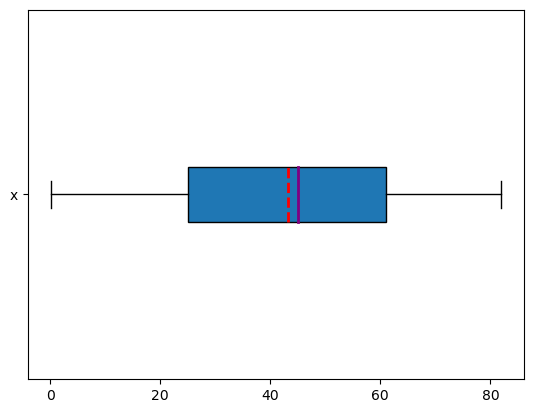

In [34]:
# Ящик с усами

plt.boxplot(x=df['age'], vert=False, showmeans=True, meanline=True,
labels=('x'), patch_artist=True, medianprops={'linewidth': 2, 'color':
'purple'}, meanprops={'linewidth': 2, 'color': 'red'})

(array([0.01036762, 0.00864764, 0.01051095, 0.01156204, 0.01426144,
        0.013927  , 0.01638752, 0.01335368, 0.00972263, 0.01332979]),
 array([8.0000e-02, 8.2720e+00, 1.6464e+01, 2.4656e+01, 3.2848e+01,
        4.1040e+01, 4.9232e+01, 5.7424e+01, 6.5616e+01, 7.3808e+01,
        8.2000e+01]),
 <BarContainer object of 10 artists>)

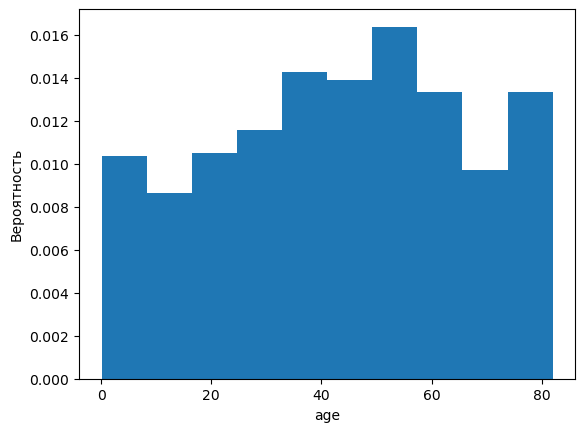

In [35]:
# Гистограмма

plt.xlabel('age')
plt.ylabel('Вероятность')
plt.hist(x=df['age'], bins=10, density=True)

array([<Axes: >], dtype=object)

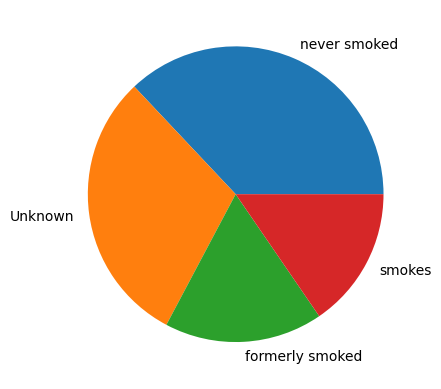

In [36]:
# Круговые диаграммы

d = df.groupby('smoking_status', sort=True).size().sort_values(ascending = False)
#строим график
d.plot(kind='pie', subplots=True)

<BarContainer object of 4 artists>

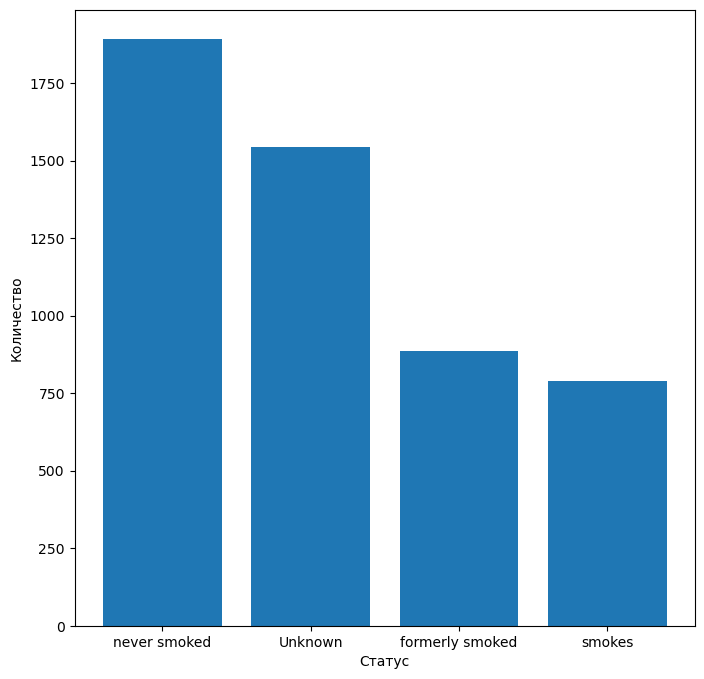

In [37]:
# Барный график

d = df.groupby('smoking_status', sort=True).size().sort_values(ascending = False)
#строим график
plt.figure(figsize=(8,8))
plt.xlabel('Статус')
plt.ylabel('Количество')
plt.bar(d.index, d.values)

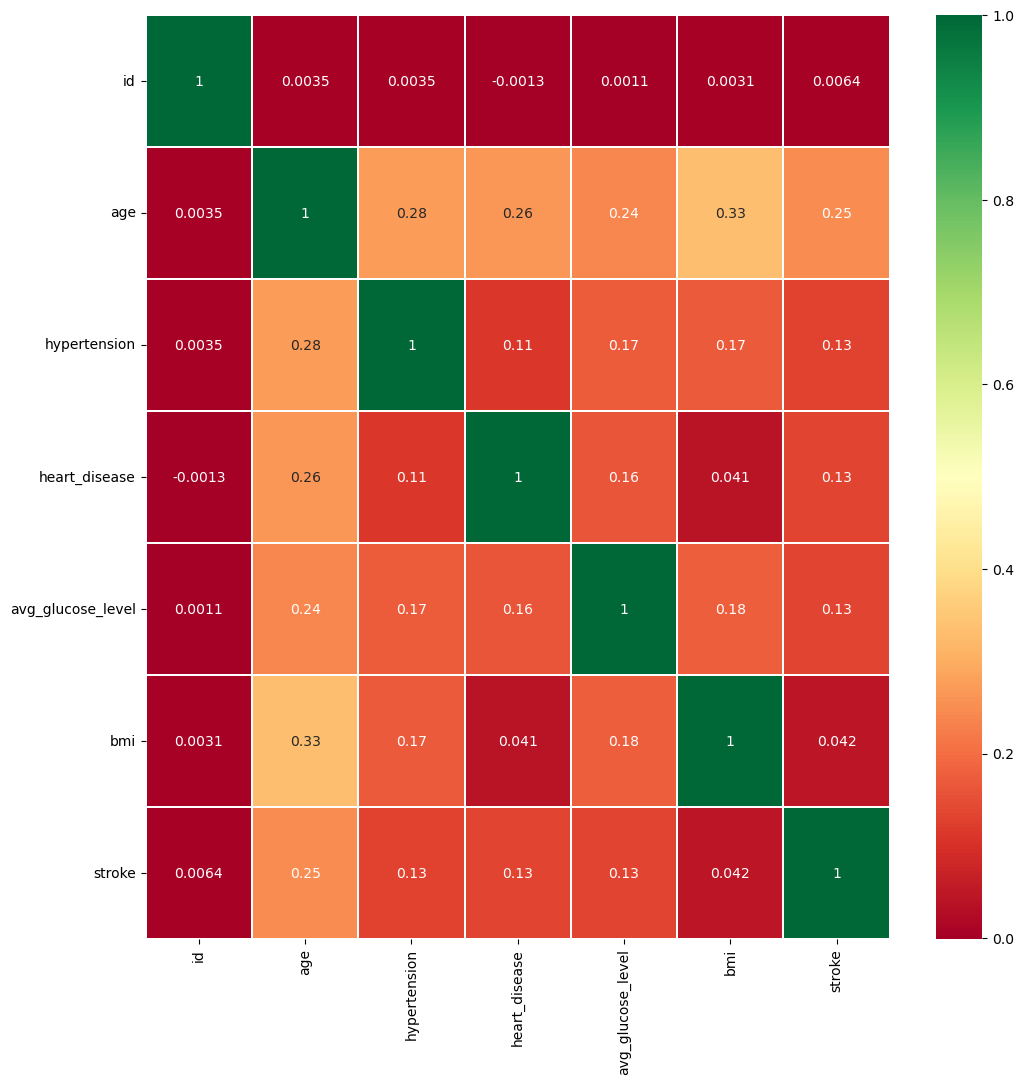

In [39]:
# Матрица корреляций

data = df.iloc[:, [0, 2, 3, 4, 8, 9, 11]]
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

C:\Users\anton\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


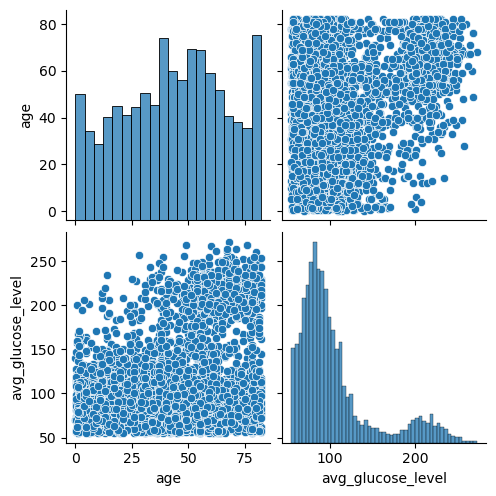

In [46]:
# Парный график

sns_plot = sns.pairplot(df[['age','avg_glucose_level']])

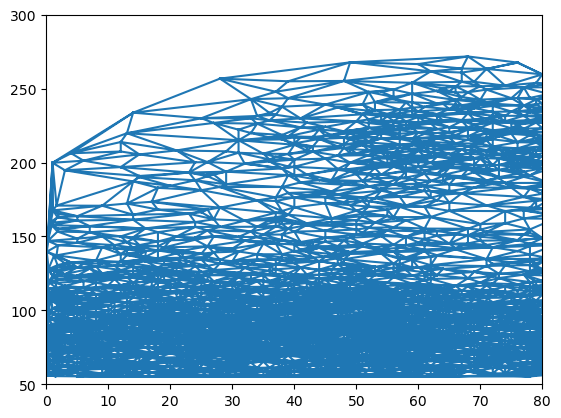

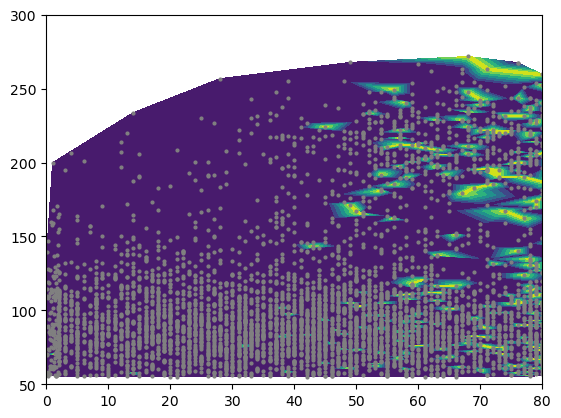

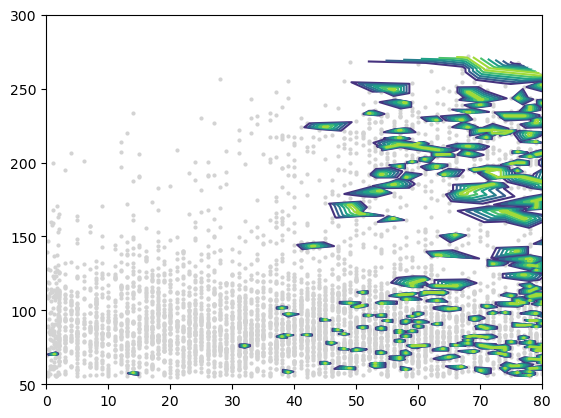

In [65]:
fig, ax = plt.subplots()
ax.triplot(df['age'], df['avg_glucose_level'])
ax.set(xlim=(0, 80), ylim=(50, 300))
plt.show()

fig, ax = plt.subplots()
ax.plot(df['age'], df['avg_glucose_level'], 'o', markersize=2, color='grey')
ax.tricontourf(df['age'], df['avg_glucose_level'], df['stroke'])
ax.set(xlim=(0, 80), ylim=(50, 300))
plt.show()

fig, ax = plt.subplots()
ax.plot(df['age'], df['avg_glucose_level'], 'o', markersize=2, color='lightgrey')
ax.tricontour(df['age'], df['avg_glucose_level'], df['stroke'])
ax.set(xlim=(0, 80), ylim=(50, 300))
plt.show()

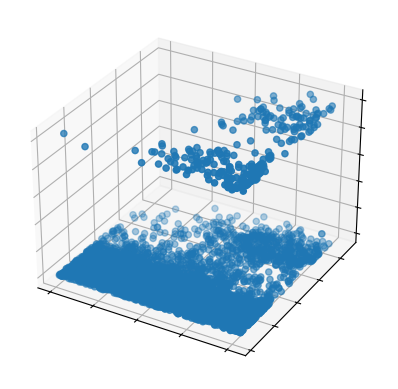

In [71]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(df['age'], df['avg_glucose_level'], df['stroke'])
ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])
plt.show()